# 删除缺失数据所在行

In [4]:
import pandas as pd
data = pd.read_csv('WorldIndex.csv', sep=',')
data.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [5]:
df = data.dropna(how='any',axis=0)

In [6]:
df

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0
...,...,...,...,...,...
171,Guyana,South America,66.507512,4136.689919,768514.0
172,Paraguay,South America,73.025634,4109.367724,6639119.0
173,Peru,South America,74.780732,6030.343259,31376671.0
174,Suriname,South America,71.294171,8818.982566,553208.0


# 人均寿命数据直方图

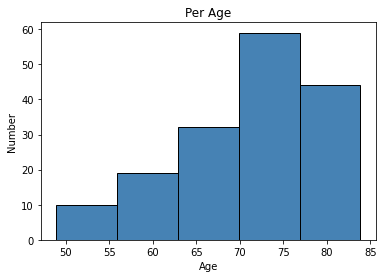

In [14]:
import matplotlib.pyplot as plt
plt.hist(x = df.Life_expectancy, # 指定绘图数据
          bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色          
        )
# 添加x轴和y轴标签
plt.xlabel('Age')
plt.ylabel('Number')

plt.title('Per Age')
 # 显示图形
plt.show()

# 人均GDP直方图 

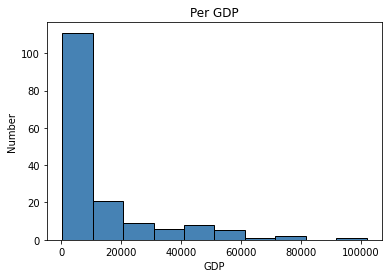

In [20]:
import matplotlib.pyplot as plt
plt.hist(x = df.GDP_per_capita, # 指定绘图数据
          bins = 10, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色          
        )
# 添加x轴和y轴标签
plt.xlabel('GDP')
plt.ylabel('Number')

plt.title('Per GDP')
 # 显示图形
plt.show()

# 人均寿命箱线图

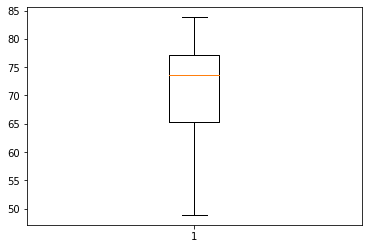

In [21]:
import matplotlib.pyplot as plt
 
plt.boxplot(x = df.Life_expectancy) 
plt.show()

# 绘制每个大洲的国家个数条形图

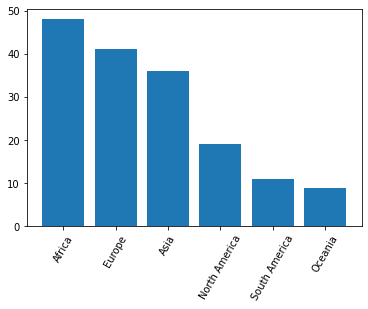

In [25]:
import numpy as np
count = df.Continent.value_counts()
name = list(con_number.index)
plt.bar(np.arange(len(name)), count)
# 设置横坐标
plt.xticks(np.arange(len(name)), name, rotation=60)   # rotation 旋转横坐标标签
plt.show()

# 绘制各大洲国家数量占比的饼图

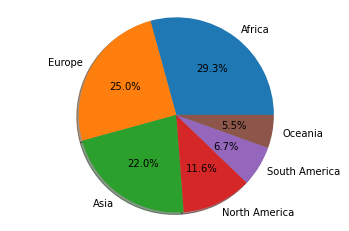

In [31]:
plt.pie(count, labels=name, autopct='%1.1f%%',shadow=True)
plt.axis('equal') 
plt.show()

# 绘制人均寿命和人均GDP的关系（散点）

Text(0, 0.5, 'Life_expectancy')

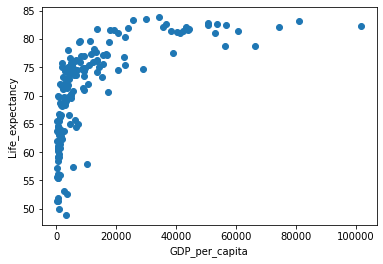

In [32]:
plt.scatter(x=df.GDP_per_capita,y=df.Life_expectancy)

plt.xlabel('GDP_per_capita')
plt.ylabel('Life_expectancy')

# 人均GDP与人均寿命的气泡图（数据点大小，正比于人口数，给不同洲的国家设置不同的颜色）

In [39]:
size=df['Population'].rank()
n=20
mapcolor = {      
   'Asia':'red',
    'Europe':'blue',
    'Africa':'orange',
    'North America':'yellow',
    'South America':'black',
    'Oceania':'pink'
}
colors = df.Continent.map(mapcolor) 

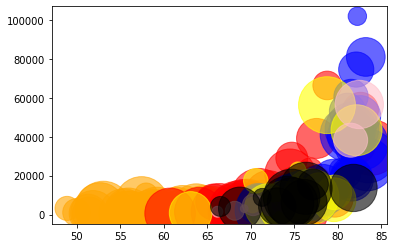

In [44]:
size=df['Population'].rank()
n=20

plt.scatter(x=df.Life_expectancy,y=df.GDP_per_capita,s=size*n,alpha=0.6,c=colors)
plt.show()

# 2.Scipy解方程

##  ①求解f(x)=2*sin(x)-x+1

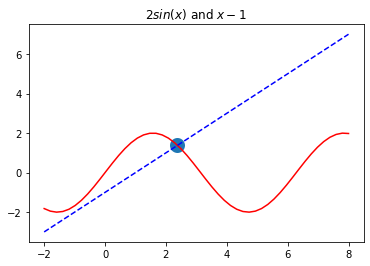

In [47]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root,fsolve

rangex1 = np.linspace(-2,8)
rangey1_1,rangey1_2 = 2*np.sin(rangex1),rangex1-1
plt.figure(1)
plt.plot(rangex1,rangey1_1,'r',rangex1,rangey1_2,'b--')
plt.title('$2sin(x)$ and $x-1$')

def f1(x):
    return np.sin(x)*2-x+1

sol1_root = root(f1,[2])
sol1_fsolve = fsolve(f1,[2])
plt.scatter(sol1_fsolve,2*np.sin(sol1_fsolve),linewidths=9)
plt.show()

## ②求解线性方程组{3X1+2X2=3;X1-2X2=5}

In [48]:
def f2(x):
    return np.array([3*x[0]+2*x[1]-3,x[0]-2*x[1]-5])

sol2_root = root(f2,[0,0])
sol2_fsolve = fsolve(f2,[0,0])
print(sol2_fsolve)

a = np.array([[3,2],[1,-2]])
b = np.array([3,5])
x = np.linalg.solve(a,b)
print(x)

[ 2.  -1.5]
[ 2.  -1.5]
